In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
PREFIX  = "Tewhey_K562_TileMPRA"
FOLDER  = "coverage_astarrseq_peak_macs_input"
REGIONS = c("GATA1", "MYC", "FADS")
PROCESS = c("raw", "norm", "deseq")

fdiry   = file.path(FD_RES, "results", PREFIX, FOLDER, "summary")
lst_dat = lapply(REGIONS, function(region){
    
    fname = paste("result", "Log2FC", "raw", region, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    dat_log2fc_raw = read_tsv(fpath, show_col_types = FALSE)

    fname = paste("result", "Log2FC", "norm", region, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    dat_log2fc_norm = read_tsv(fpath, show_col_types = FALSE)

    fname = paste("result", "Log2FC", "deseq", region, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    dat_log2fc_deseq = read_tsv(fpath, show_col_types = FALSE)
    
    dat1 = dat_log2fc_raw %>%
        dplyr::rename(Log2FC_raw = log2FoldChange)
    
    dat2 = dat_log2fc_norm %>%
        dplyr::select(Peak, log2FoldChange) %>%
        dplyr::rename(Log2FC_norm = log2FoldChange)
    
    dat3 = dat_log2fc_deseq %>%
        dplyr::select(Peak, log2FoldChange) %>%
        dplyr::rename(Log2FC_deseq = log2FoldChange)
    
    dat = dat1 %>%
        left_join(dat2, by="Peak") %>%
        left_join(dat3, by="Peak")
    return(dat)
})

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.GATA1.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.norm.GATA1.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.deseq.GATA1.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.MYC.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.norm.MYC.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.deseq.MYC.tsv"
[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/re

In [12]:
lapply(lst_dat, dim)

[[1]]
[1] 206   9

[[2]]
[1] 188   9

[[3]]
[1] 23  9

In [13]:
head(lst_dat[[1]])

Chrom,Start,End,Peak,Input,Output,Log2FC_raw,Log2FC_norm,Log2FC_deseq
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47796208,47796828,chrX_47796208_47796828,5950.167,20059.4,1.7532765,2.684628,0.95281868
chrX,47806139,47808167,chrX_47806139_47808167,19355.333,33948.6,0.8106209,1.753382,0.02557172
chrX,47809119,47809445,chrX_47809119_47809445,2000.500,18585.6,3.2157527,4.164169,2.43603768
chrX,47814810,47815443,chrX_47814810_47815443,6368.167,18144.8,1.5106062,2.446712,0.72157768
chrX,47816459,47818070,chrX_47816459_47818070,17023.833,56979.6,1.7428896,2.670336,0.94178695
chrX,47836113,47837157,chrX_47836113_47837157,8899.000,120197.0,3.7556139,4.709841,2.97943519


In [6]:
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    region = REGIONS[[idx]]
    gpt = ggplot(dat, aes(x=Log2FC_raw, y=Log2FC_deseq)) +
        geom_point(size=1) + 
        labs(x="Log2FC (Raw)", y="Log2FC (DESeq2)", title=paste0("TMPRA (", region, ")")) +
        theme_cowplot() +
        theme(
            panel.grid.major = element_line(colour="grey90", linewidth=0.5),
            panel.grid.minor = element_line(colour="grey90", linewidth=0.2))
    return(gpt)
})

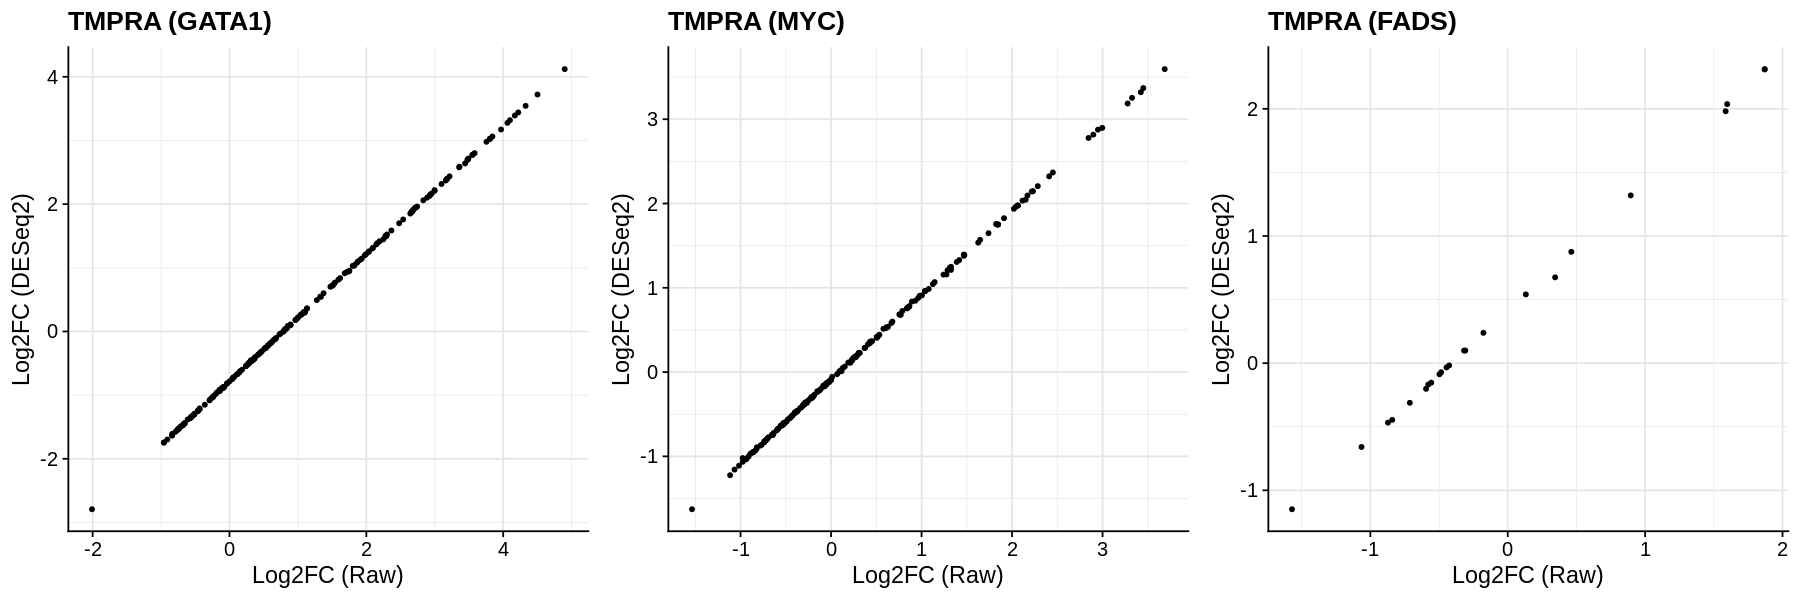

In [11]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1)

In [12]:
PREFIX  = "Tewhey_K562_TileMPRA"
FOLDER  = "coverage_astarrseq_peak_macs_input"
REGIONS = c("GATA1", "MYC", "FADS")
PROCESS = c("raw", "norm")

region  = REGIONS[1]
process = PROCESS[1]





[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.GATA1.tsv"


Rows: 206 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Peak
dbl (5): Start, End, Input, Output, log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.norm.GATA1.tsv"


Rows: 206 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Peak
dbl (5): Start, End, Input, Output, log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/Tewhey_K562_TileMPRA/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.deseq.GATA1.tsv"


Rows: 206 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(dat_log2fc_raw)

Chrom,Start,End,Peak,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47796208,47796828,chrX_47796208_47796828,5950.167,20059.4,1.7532765
chrX,47806139,47808167,chrX_47806139_47808167,19355.333,33948.6,0.8106209
chrX,47809119,47809445,chrX_47809119_47809445,2000.500,18585.6,3.2157527
chrX,47814810,47815443,chrX_47814810_47815443,6368.167,18144.8,1.5106062
chrX,47816459,47818070,chrX_47816459_47818070,17023.833,56979.6,1.7428896
chrX,47836113,47837157,chrX_47836113_47837157,8899.000,120197.0,3.7556139


In [5]:
head(dat_log2fc_deseq)

Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,10513.875,0.95281868,0.08207970,11.6084570,3.732910e-31,4.660482e-31
chrX_47806139_47808167,24157.939,0.02557172,0.02814903,0.9084403,3.636456e-01,3.672108e-01
chrX_47809119_47809445,7455.885,2.43603768,0.03405452,71.5334643,0.000000e+00,0.000000e+00
chrX_47814810_47815443,10298.260,0.72157768,0.02954264,24.4249592,9.289171e-132,1.594641e-131
chrX_47816459_47818070,29919.229,0.94178695,0.05242764,17.9635575,3.759239e-72,5.377800e-72
chrX_47836113_47837157,45600.703,2.97943519,0.04843894,61.5090955,0.000000e+00,0.000000e+00


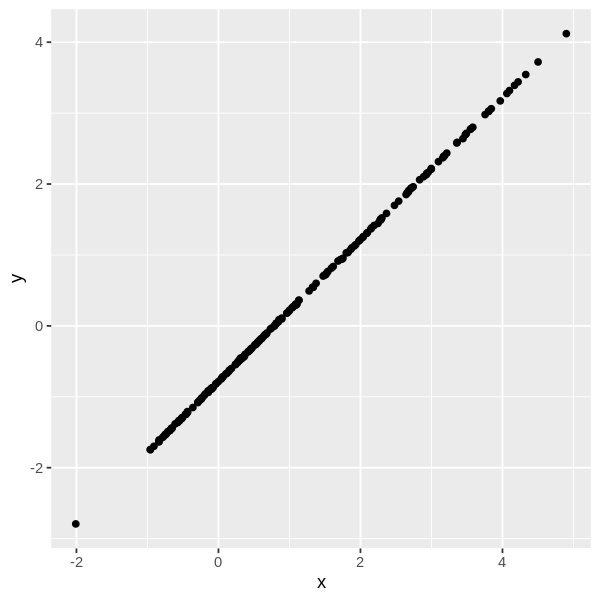

In [14]:
x = dat_log2fc_raw$log2FoldChange
y = dat_log2fc_deseq$log2FoldChange
options(repr.plot.height=5, repr.plot.width=5)
qplot(x, y)

In [15]:
dat   = dat_log2fc_raw
dat   = dat %>% arrange(log2FoldChange)
peaks = dat$Peak

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


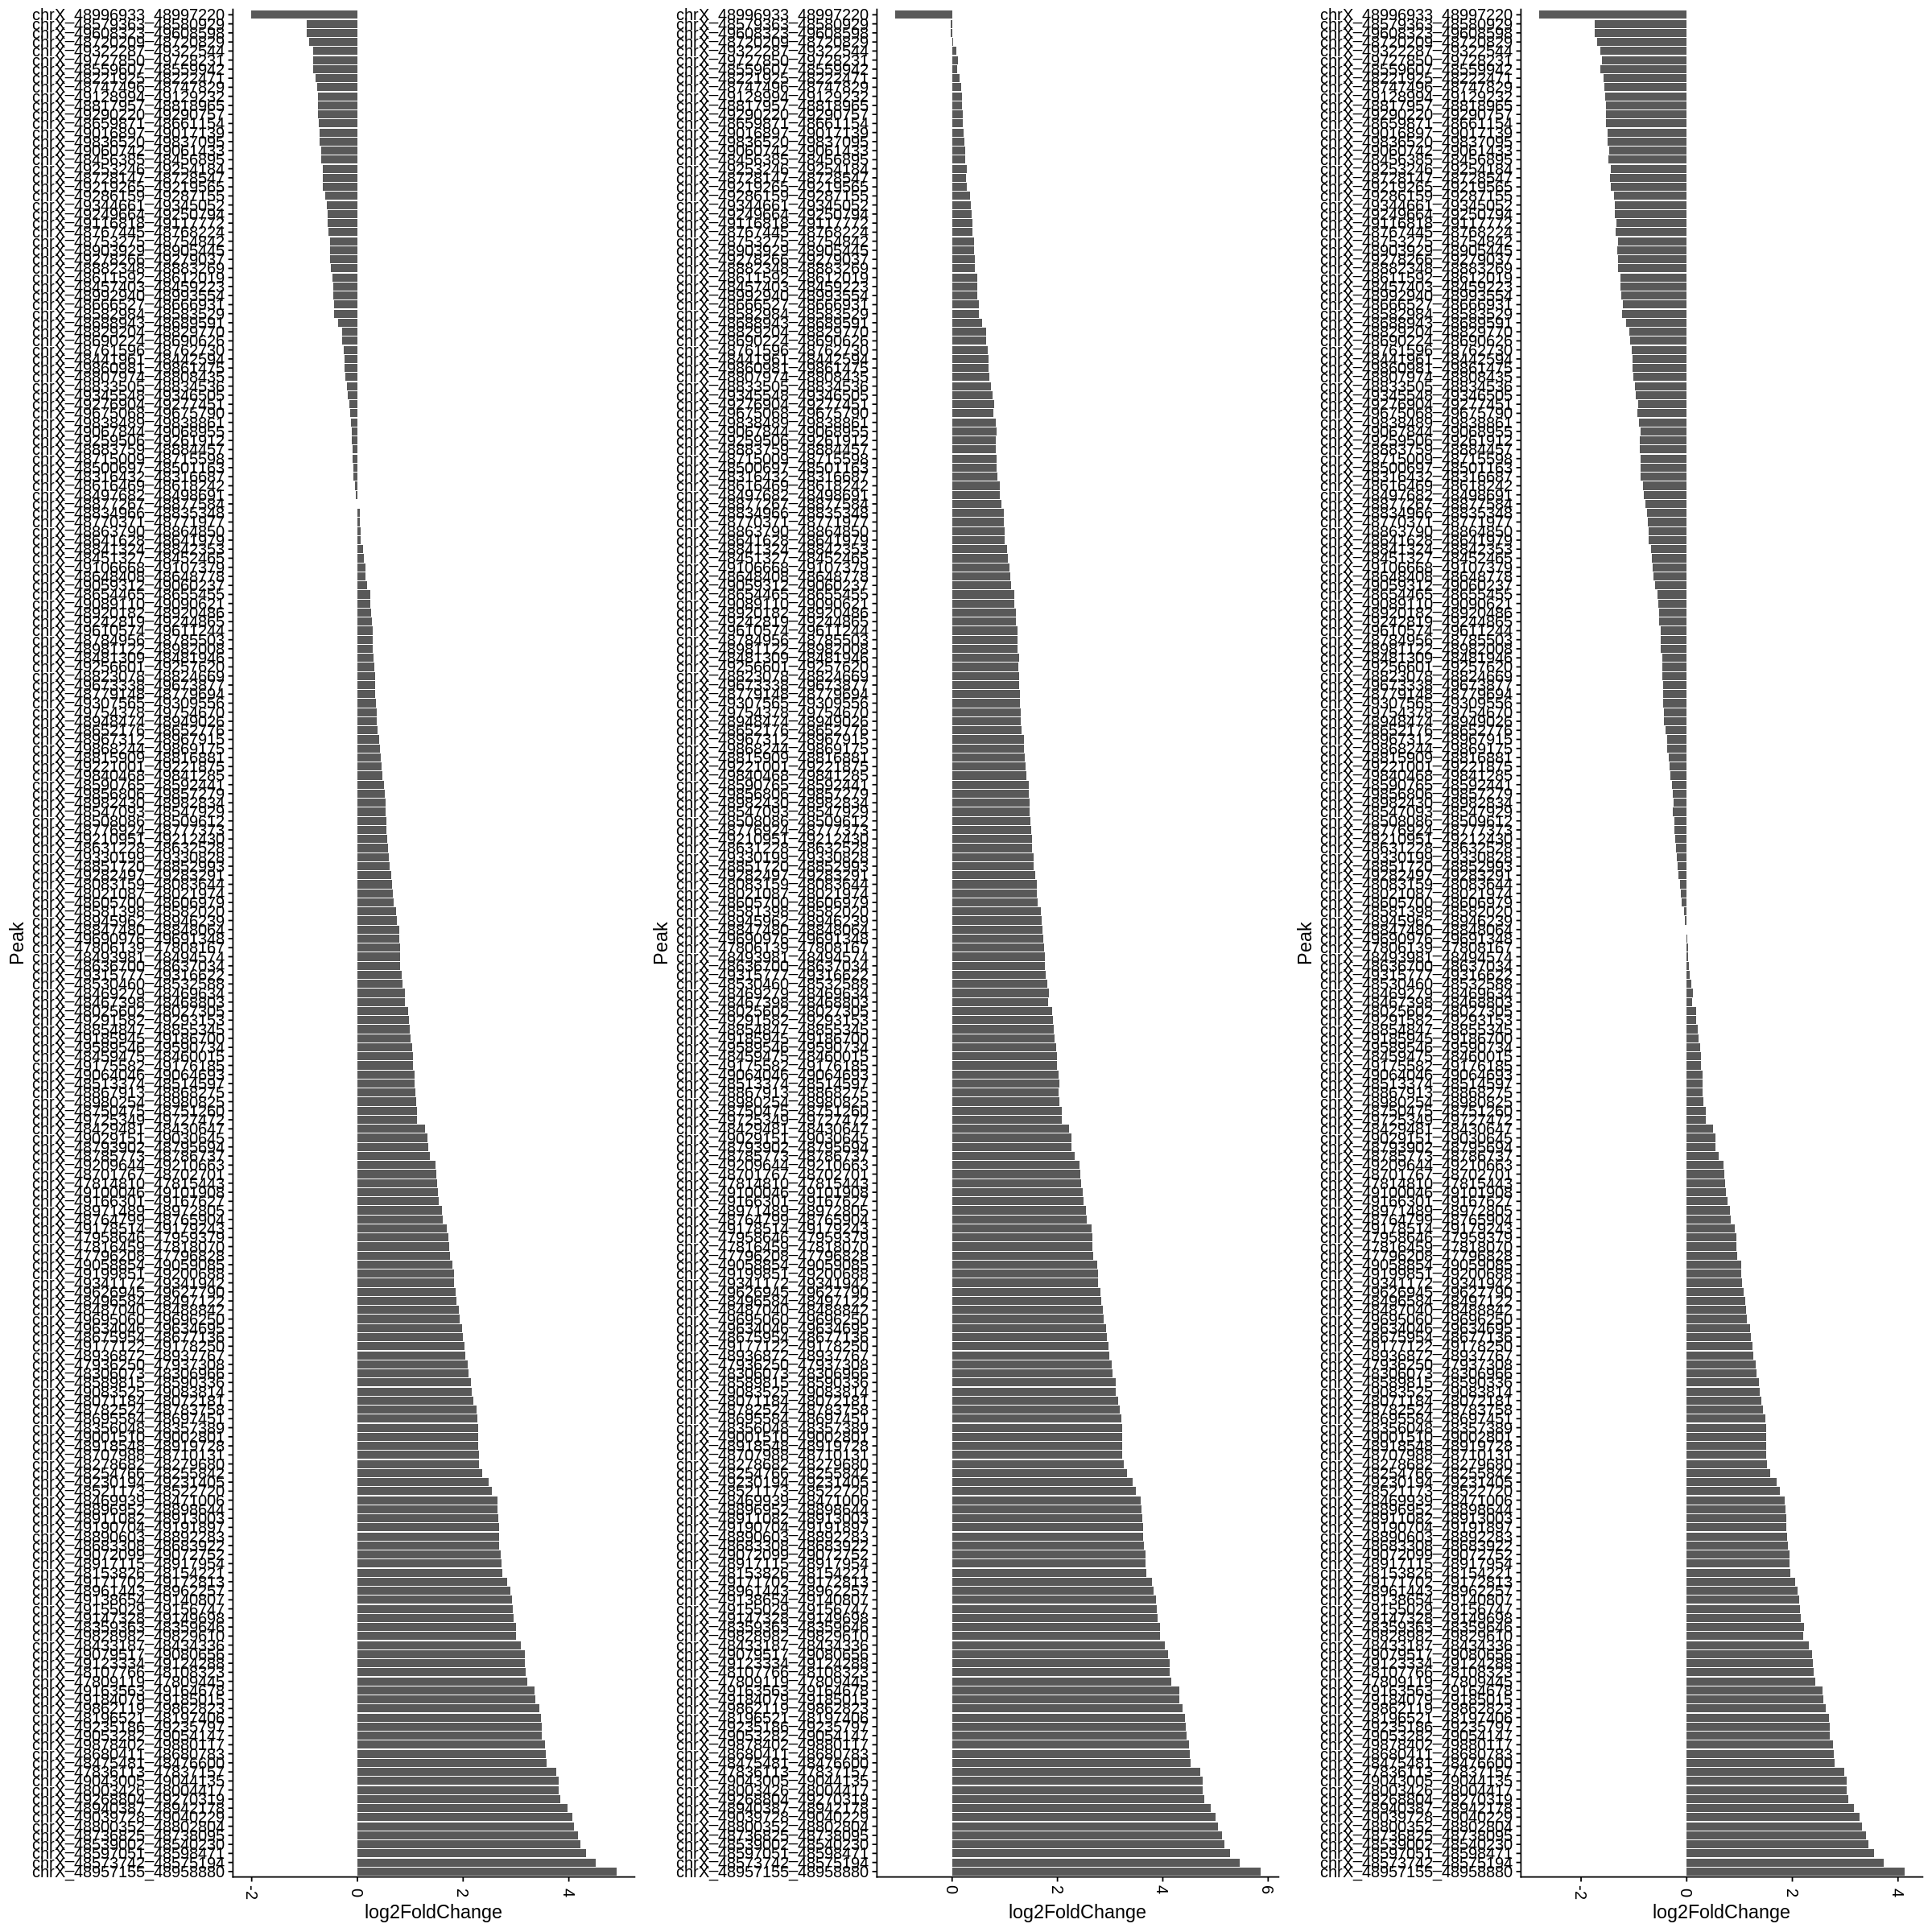

In [18]:
lst_dat = list(dat_log2fc_raw, dat_log2fc_norm, dat_log2fc_deseq)

lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
        geom_histogram(stat="identity") + 
        theme_cowplot() + 
        theme(axis.text.x = element_text(vjust=0.5, angle=270))
    return(gpt)
})

options(repr.plot.height=30, repr.plot.width=20)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1, align = "h")

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


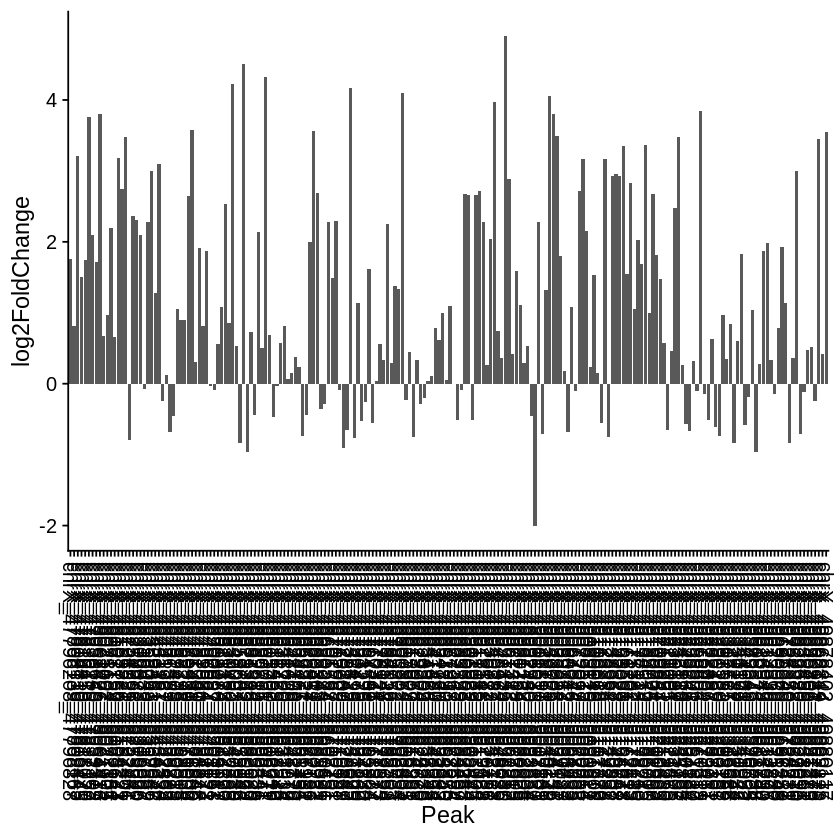

In [8]:
dat = dat_log2fc_raw
gpt = ggplot(dat, aes(x=Peak, y=log2FoldChange)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))
print(gpt)